In [1]:
import import_ipynb as ipynb
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
%%capture
knn = ipynb.NotebookLoader().load_module('knn')

#### Now we continue with the decision tree. You should use the decision tree classifier you find in scikit-learn.

##### Use the gridsearchCV as you did for KNN. As hyperparameters use max_depth and criterion. Use accuracy as previously

In [3]:
dt = DecisionTreeClassifier()

##### hyperparameters

In [4]:
param_grid = {
    'max_depth': list(range(1, 50)),
    'criterion': ['gini', 'entropy']
}

In [5]:
grid = GridSearchCV(estimator=dt,
                    param_grid=param_grid,
                    cv=knn.folds,
                    scoring='accuracy',
                    return_train_score=False)

In [6]:
grid.fit(knn.X_train, knn.y_train)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [7]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [8]:
grid.best_score_

1.0

##### Does the criterion have an impact on the accuracy? Make an investigation so you can answer this question

In [9]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005031,0.001490,0.000976,0.000512,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.664615,0.673846,0.643077,...,0.695385,0.624615,0.689231,0.635802,0.62037,0.648148,0.66358,0.660241,0.022143,97
1,0.005623,0.000655,0.001052,0.000387,gini,2,"{'criterion': 'gini', 'max_depth': 2}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,0.000000,1
2,0.006099,0.001062,0.001249,0.000433,gini,3,"{'criterion': 'gini', 'max_depth': 3}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,0.000000,1
3,0.005760,0.000576,0.001161,0.000572,gini,4,"{'criterion': 'gini', 'max_depth': 4}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,0.000000,1
4,0.007391,0.003229,0.001350,0.000653,gini,5,"{'criterion': 'gini', 'max_depth': 5}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.005205,0.000409,0.000851,0.000357,entropy,45,"{'criterion': 'entropy', 'max_depth': 45}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,0.000000,1
94,0.005001,0.000318,0.000826,0.000427,entropy,46,"{'criterion': 'entropy', 'max_depth': 46}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,0.000000,1
95,0.005254,0.000535,0.000682,0.000512,entropy,47,"{'criterion': 'entropy', 'max_depth': 47}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,0.000000,1
96,0.005066,0.000237,0.000903,0.000437,entropy,48,"{'criterion': 'entropy', 'max_depth': 48}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,0.000000,1


##### Plot the tree with the optimal hyperparameters

[Text(0.6, 0.8333333333333334, 'ax <= -1.011\ngini = 0.667\nsamples = 6496\nvalue = [2175, 2153, 2168]\nclass = Standing_up'),
 Text(0.4, 0.5, 'ay <= -5.098\ngini = 0.5\nsamples = 4321\nvalue = [0, 2153, 2168]\nclass = Laying_down'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2168\nvalue = [0, 0, 2168]\nclass = Laying_down'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2153\nvalue = [0, 2153, 0]\nclass = Sitting'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2175\nvalue = [2175, 0, 0]\nclass = Standing_up')]

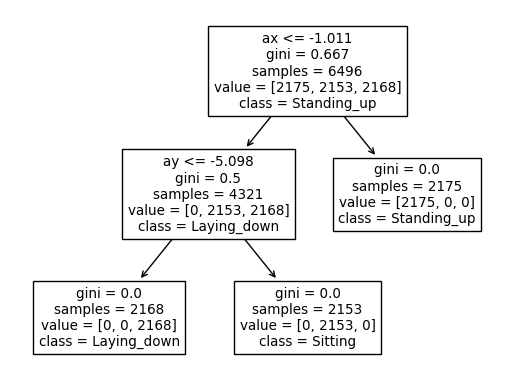

In [15]:
plot_tree(
    decision_tree=grid.best_estimator_,
    feature_names=['ax', 'ay', 'az', 'gx', 'gy', 'gz'],
    class_names=knn.stationary_positions
)

#### Now it is time you look at the test set.

##### Using the tree-model above to predict the accuracy.

In [11]:
y_pred = grid.predict(X=knn.X_test)

In [12]:
accuracy_score(y_true=knn.y_test, y_pred=y_pred)

1.0

##### Plot the confusion matrix as well

In [13]:
confusion_matrix(y_true=knn.y_test, y_pred=y_pred)

array([[974,   0,   0],
       [  0, 923,   0],
       [  0,   0, 888]], dtype=int64)

##### Explain the difference between the accuracy for the validation set and the test set

##### Explain the result you see in the confusion matrix

#### As a last step, it is time to compare the results from the KNN-model and the decision tree.

##### What is the difference between the accuracies?

##### What is the difference between the confusion matrices?